In [1]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
df= pd.read_csv(r"C:\Users\raval\Downloads\bike+sharing+dataset\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


In [3]:
# df.corr()
df[["temp","cnt"]].corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


In [6]:
# df.corr()
df[["atemp","cnt"]].corr()

,atemp,cnt
atemp,1.000000,0.631066
cnt,0.631066,1.000000


In [8]:
# df.corr()
df[["temp","atemp"]].corr()

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


In [9]:
df.temp.mean()

0.495384788508892

In [10]:
df.atemp.mean()

0.47435398864569084

In [11]:
df.cnt.sum()

3292679

In [14]:
df[["holiday","cnt"]].corr()

,holiday,cnt
holiday,1.000000,-0.068348
cnt,-0.068348,1.000000


In [16]:
df.corr()

C:\Users\raval\AppData\Local\Temp\ipykernel_5320\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [30]:
X = df[["weekday","temp","weathersit","atemp","hum","windspeed"]]
y= df["cnt"]

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

In [33]:
y_pred = reg.predict(X_test)

In [34]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.5204834914148074


In [35]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1386.6523554442701


In [29]:
df.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Prepare the data
X = df[['holiday', 'weathersit']].values
y = df['cnt'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and RMSLE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

print("RMSE:", rmse)
print("RMSLE:", rmsle)


RMSE: 1920.8483602001402
RMSLE: 0.6728349405850486


Cross-validated RMSE: 1841.3507000130273
Cross-validated RMSLE: 0.5401856791558073


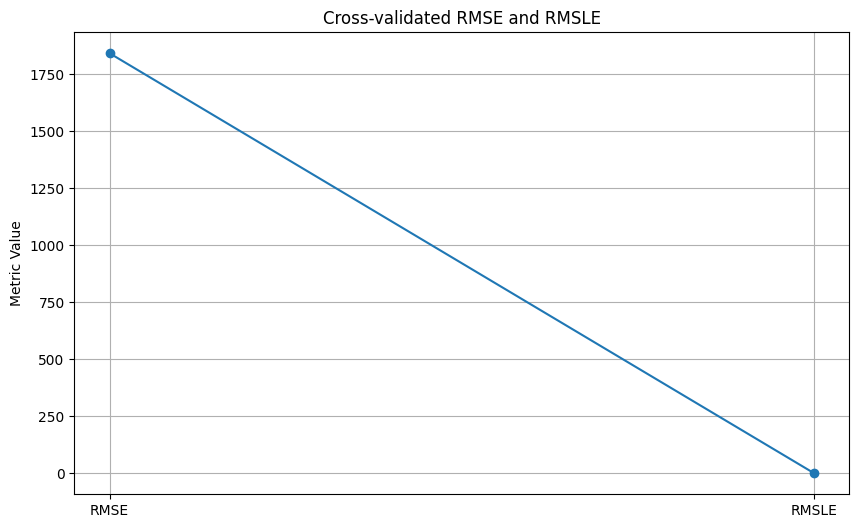

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Cross-validation to get predictions and evaluate metrics
y_pred = cross_val_predict(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Calculate RMSE and RMSLE for cross-validated predictions
cv_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
cv_rmsle = np.sqrt(mean_squared_log_error(y_train, y_pred))

print("Cross-validated RMSE:", cv_rmse)
print("Cross-validated RMSLE:", cv_rmsle)

# Plot the RMSE and RMSLE values
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [cv_rmse, cv_rmsle], marker='o')
plt.xticks([0, 1], ['RMSE', 'RMSLE'])
plt.ylabel('Metric Value')
plt.title('Cross-validated RMSE and RMSLE')
plt.grid(True)
plt.show()

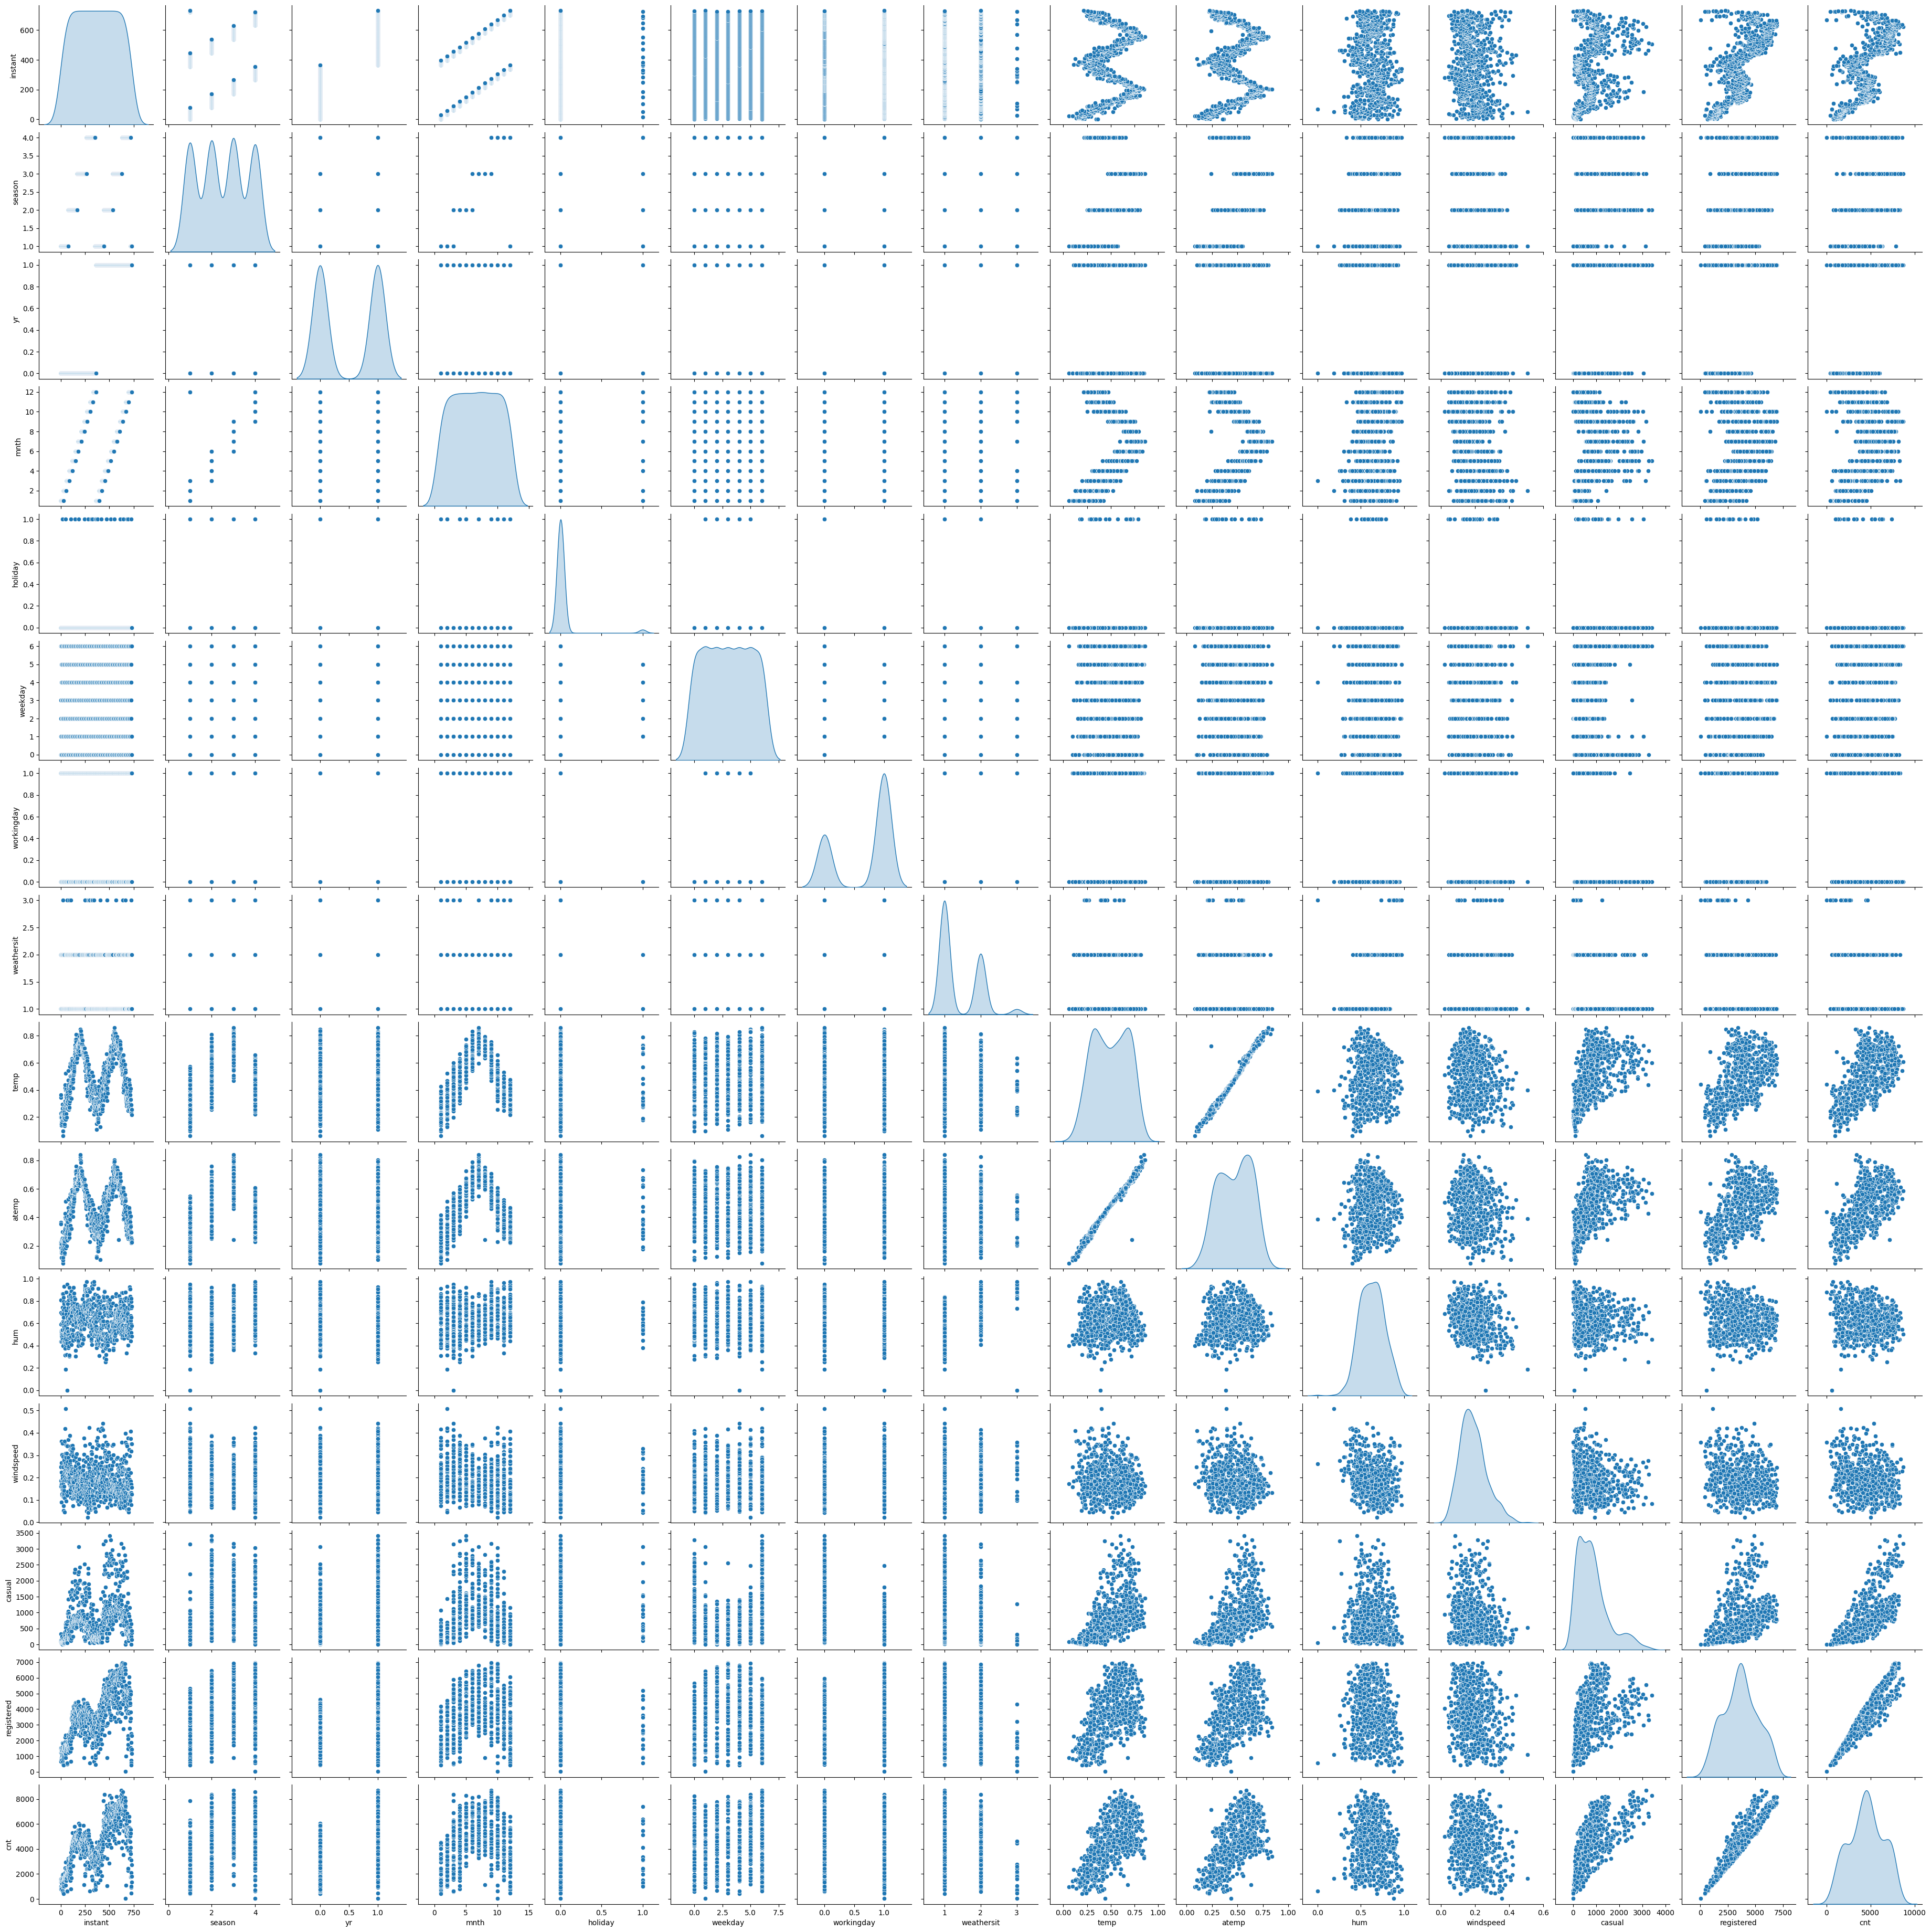

In [17]:
import seaborn as sns

sns.pairplot(df, diag_kind='kde')
plt.show()

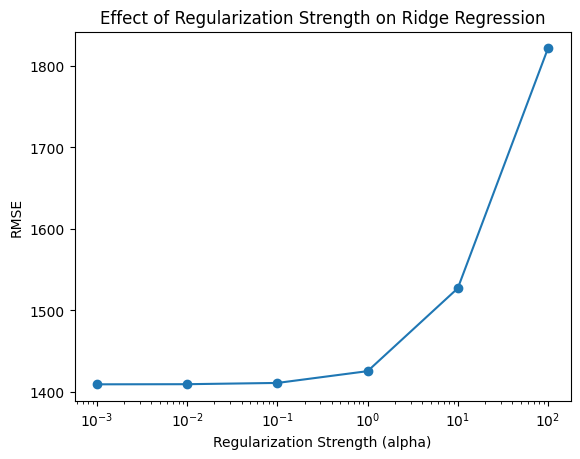

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['temp', 'weathersit', 'hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a dictionary to store RMSE scores for each alpha
rmse_scores = {}

# Iterate through regularization strengths
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[alpha] = rmse

# Plot the RMSE curve
plt.plot(alphas, list(rmse_scores.values()), marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on Ridge Regression')
plt.show()

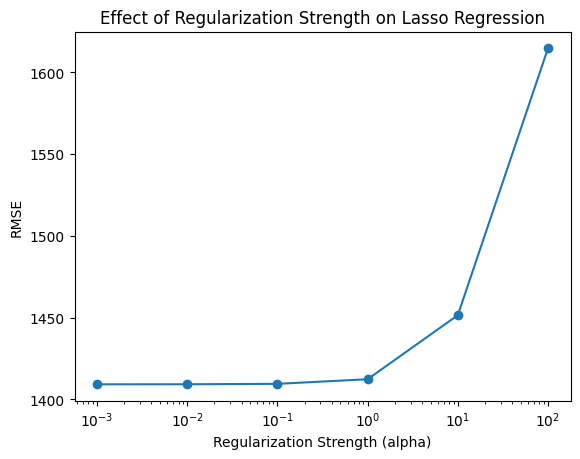

In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['temp', 'weathersit', 'hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a dictionary to store RMSE scores for each alpha
rmse_scores = {}

# Iterate through regularization strengths
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[alpha] = rmse

# Plot the RMSE curve
plt.plot(alphas, list(rmse_scores.values()), marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on Lasso Regression')
plt.show()

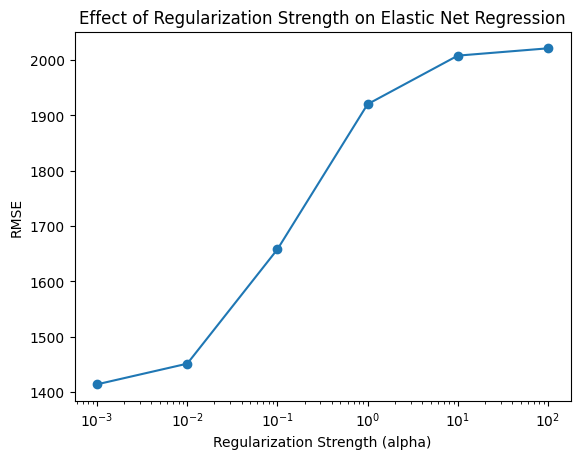

In [6]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['temp', 'weathersit', 'hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a dictionary to store RMSE scores for each alpha
rmse_scores = {}

# Iterate through regularization strengths
for alpha in alphas:
    model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio=0.5 means equal combination of L1 and L2 penalties (Elastic Net)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[alpha] = rmse

# Plot the RMSE curve
plt.plot(alphas, list(rmse_scores.values()), marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on Elastic Net Regression')
plt.show()